## **YB 4조**
- 이용 모델:
  - RandomForest
  - XGBoost
  - Lightgbm
  - Decision Tree

- 각기 다른 전처리와 모델의 적용 결과를 추출하고 리더보드에 제출해서 가장 점수가 높은 결과를 최종 선정

### 1. RandomForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline

In [ ]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/ESAA/data/train_wine.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/data/test_wine.csv')

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ESAA/data/sample_submission_wine.csv')

In [ ]:
# 데이터 확인
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
train = train.drop(['index'], axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test = test.drop(['index'], axis=1)
test.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
# shape 확인
train.shape, test.shape

((5497, 13), (1000, 12))

In [ ]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


- EDA

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64


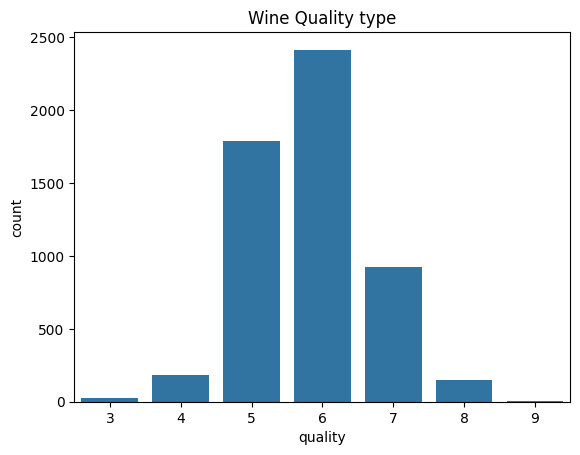

In [ ]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality'])
plt.title("Wine Quality type", fontsize=12);

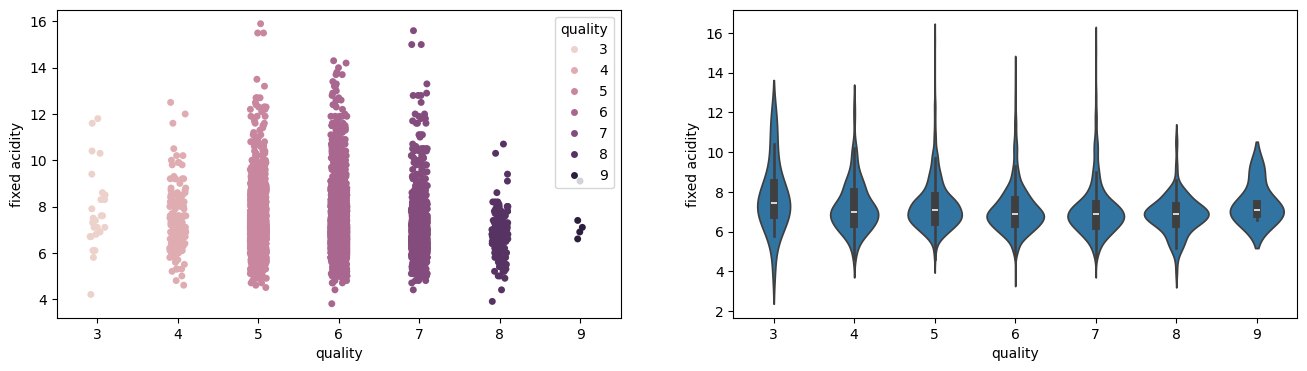

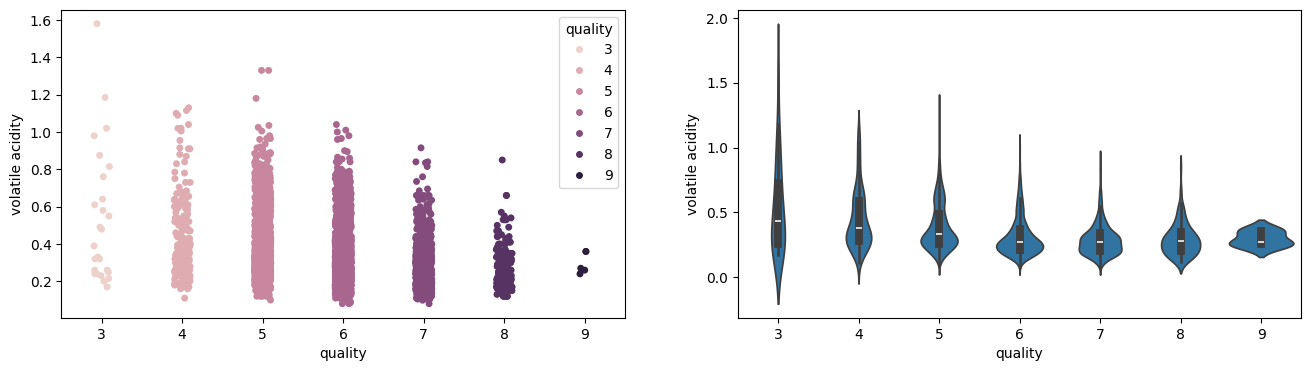

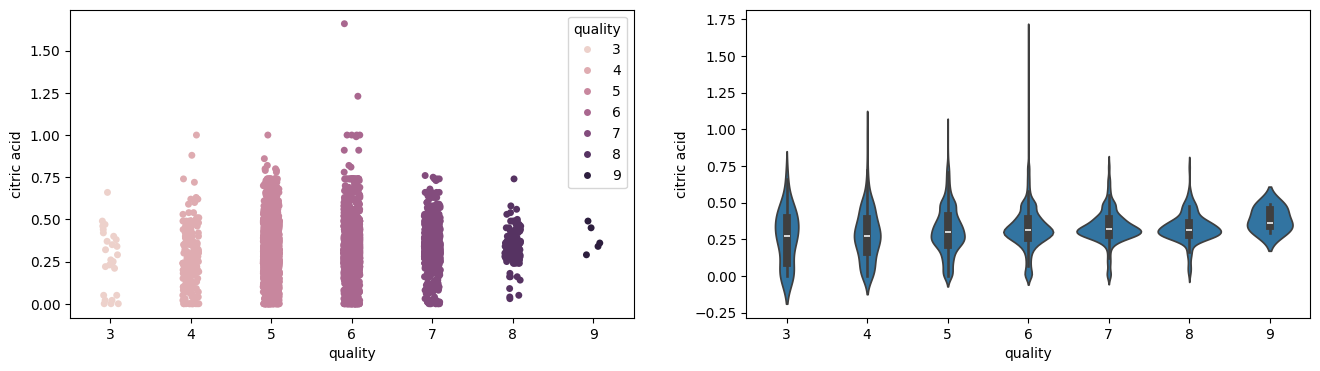

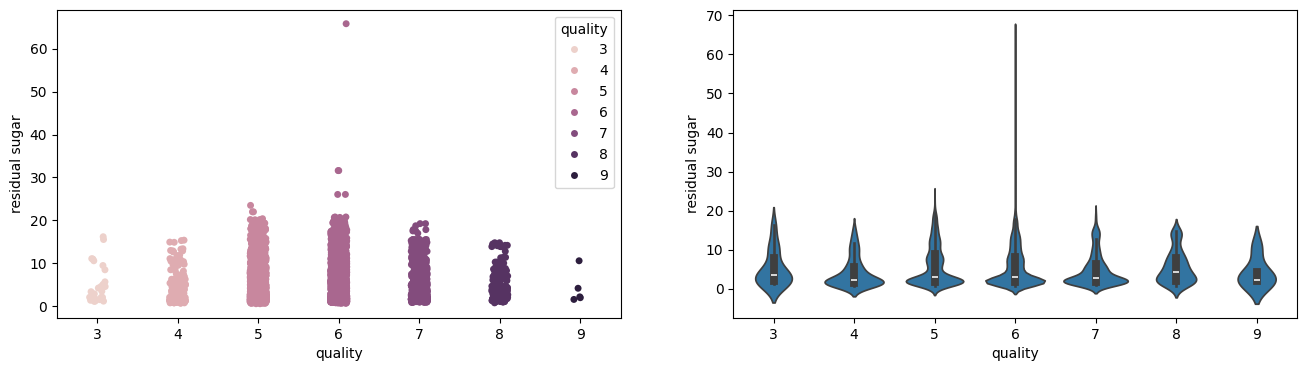

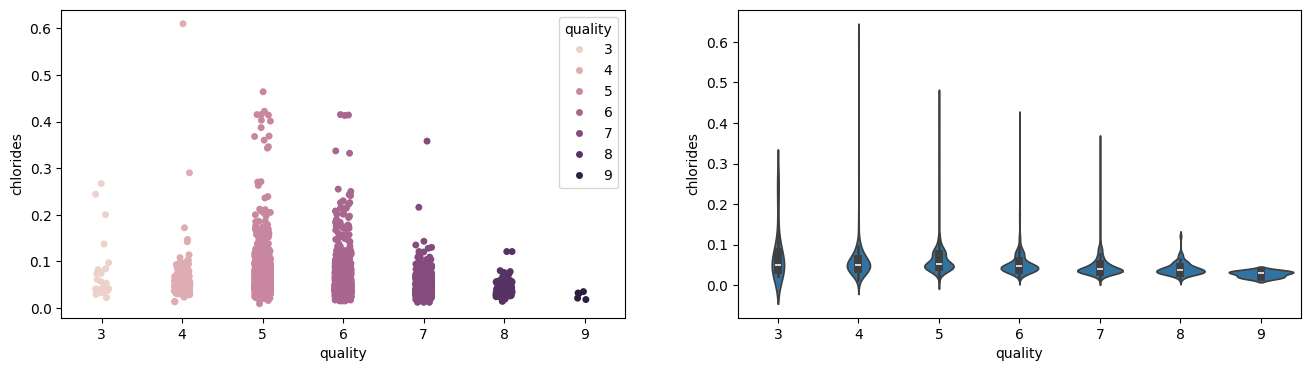

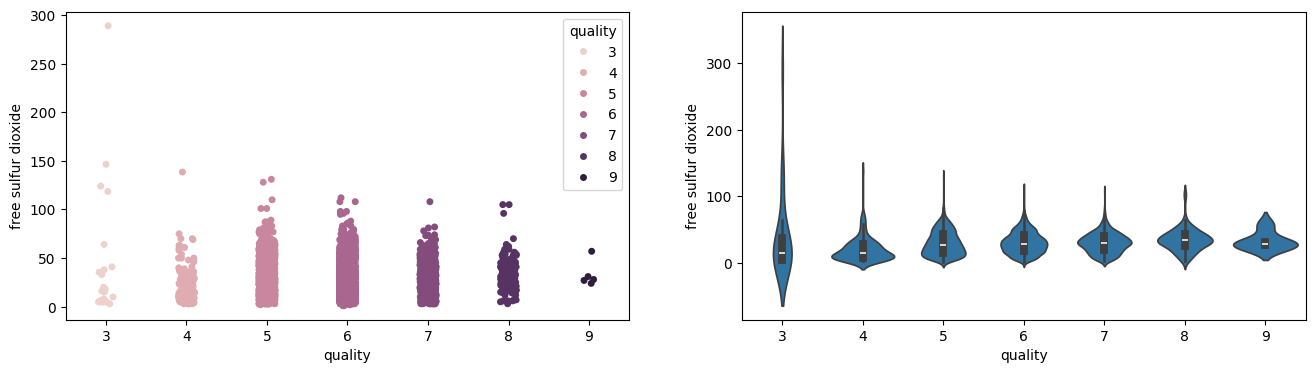

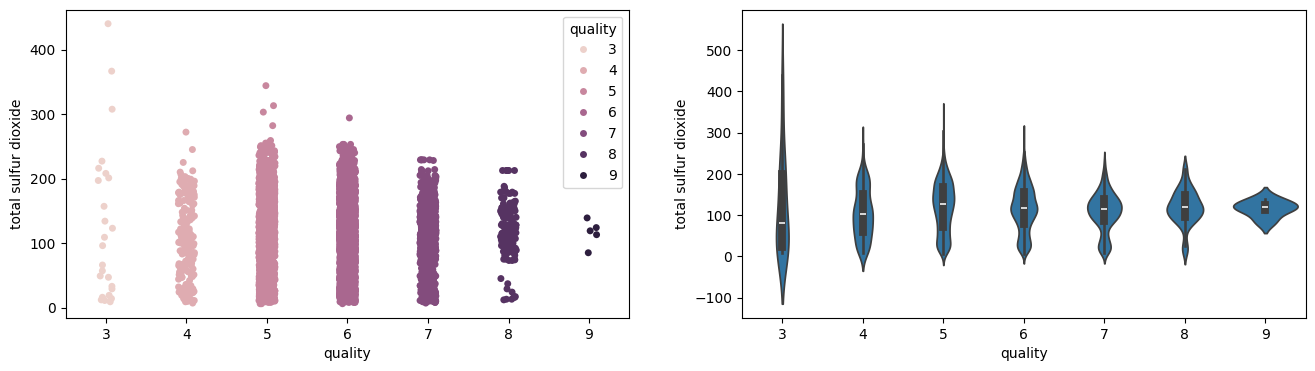

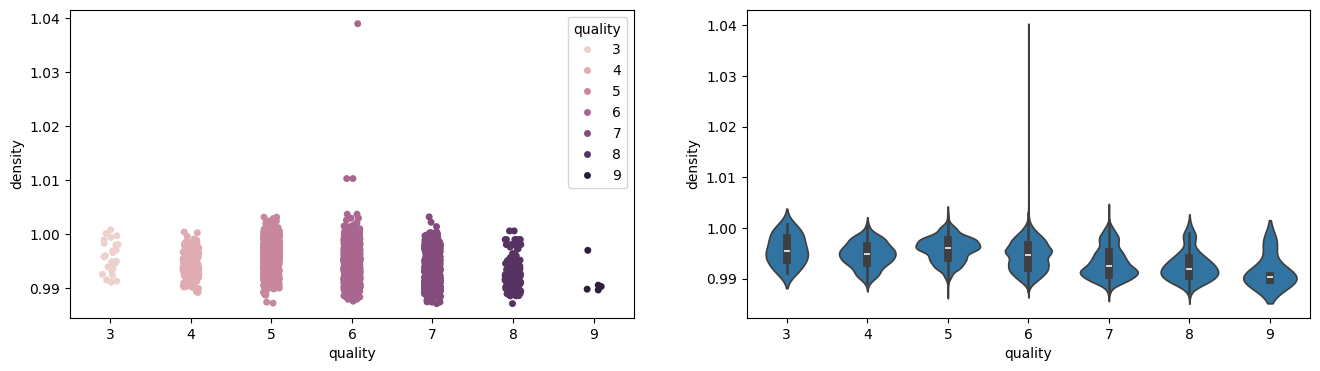

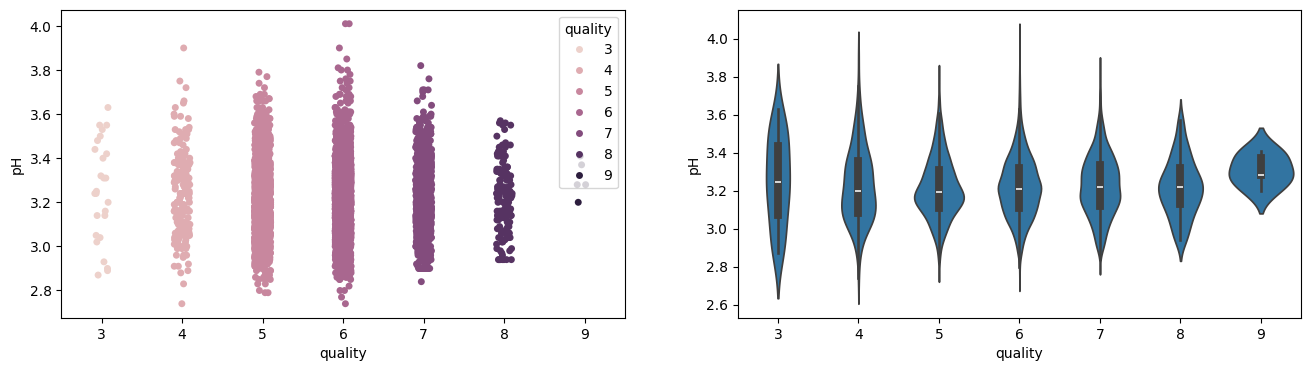

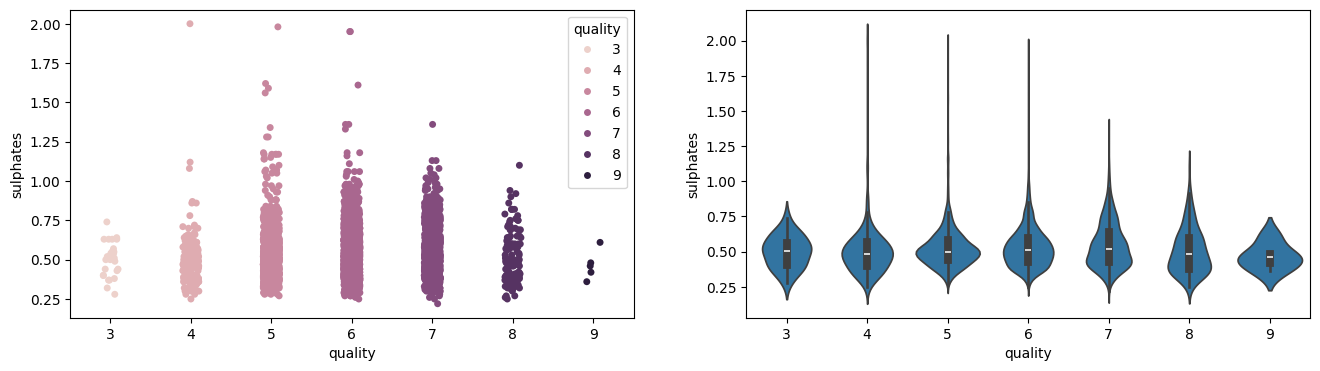

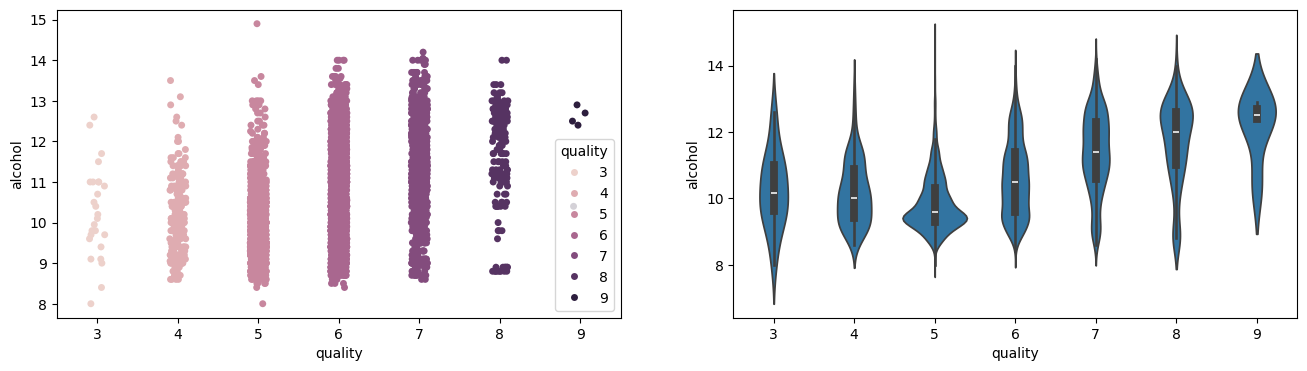

In [ ]:
#distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])

show_dist_plot(train, numerical_columns)

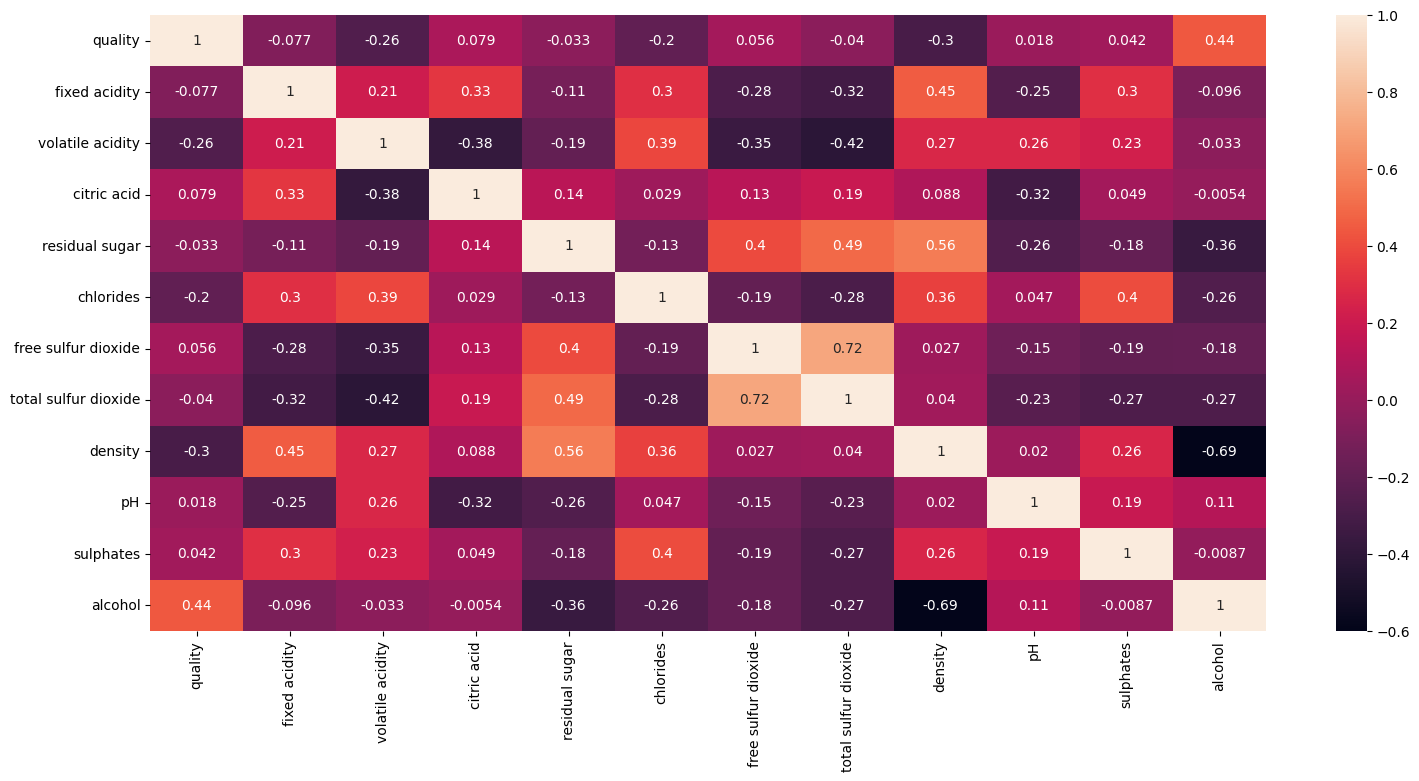

In [ ]:
# 히트맵
# type은 제외
x = train.drop(['type'], axis=1)
plt.figure(figsize=(18, 8))
corr = x.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Standardscaler
ss = StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])

# factorize
train['type'] = pd.factorize(train['type'])[0]
train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0


In [ ]:
test[numerical_columns] = ss.transform(test[numerical_columns])
test['type'] = pd.factorize(test['type'])[0]
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.390243,-0.172555,1.112802,0.244295,-0.369640,-1.098765,-0.756293,-0.289803,-1.988209,-1.007643,0.916835,0
1,4.730148,0.562696,1.802026,-0.743880,0.409577,-0.872422,-1.342614,1.900261,-0.992553,-0.271277,-1.259963,1
2,-0.551562,-0.356368,-0.334569,-0.050055,-0.456220,0.768567,1.127044,0.042025,-0.183584,1.067570,-0.925071,0


In [ ]:
X = train.drop(['quality'], axis=1)
y = train['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((4397, 12), (1100, 12))

- 랜덤 포레스트 실행

In [ ]:
# 하이퍼 파라미터 설정 및 train 데이터셋을 이용한 예측력 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트와 그리드 서치를 사용한 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200],           # 트리 개수를 100과 200으로 제한
    'max_depth': [10, 20, None],          # 트리 깊이를 10, 20, 또는 제한 없음(None)으로 설정
    'min_samples_split': [2, 5],          # 분할 최소 샘플 수를 2와 5로 설정
    'min_samples_leaf': [1, 2],           # 리프 노드의 최소 샘플 수를 1과 2로 설정
    'max_features': ['sqrt', 'log2']      # 특성 개수를 제곱근 또는 로그 기준으로 설정
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.6520364050056882


In [ ]:
# test 데이터 셋 예측
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train = train.drop(columns=['quality'], axis=1)
y_train = train['quality']
X_test = test

# 2. 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(random_state=42)

# 3. GridSearchCV 설정 및 학습
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. 최적의 하이퍼파라미터 및 훈련 세트 정확도 확인
print("Best parameters:", grid_search.best_params_)
print("Best training accuracy:", grid_search.best_score_)

# 최적 모델로 테스트 데이터 예측
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best training accuracy: 0.6772712383158244


In [ ]:
y_pred.shape

(1000,)

In [ ]:
# 제출 파일 생성
submission['quality'] = y_pred  # 예측 결과를 'quality' 열에 추가
submission.to_csv('my_submission.csv', index=False)

print("제출 파일이 'my_submission.csv'에 저장되었습니다.")

제출 파일이 'my_submission.csv'에 저장되었습니다.


In [ ]:
my_submission = pd.read_csv('my_submission.csv')
my_submission.head()

,index,quality
0,0,6
1,1,6
2,2,6
3,3,5
4,4,6


- 시각화

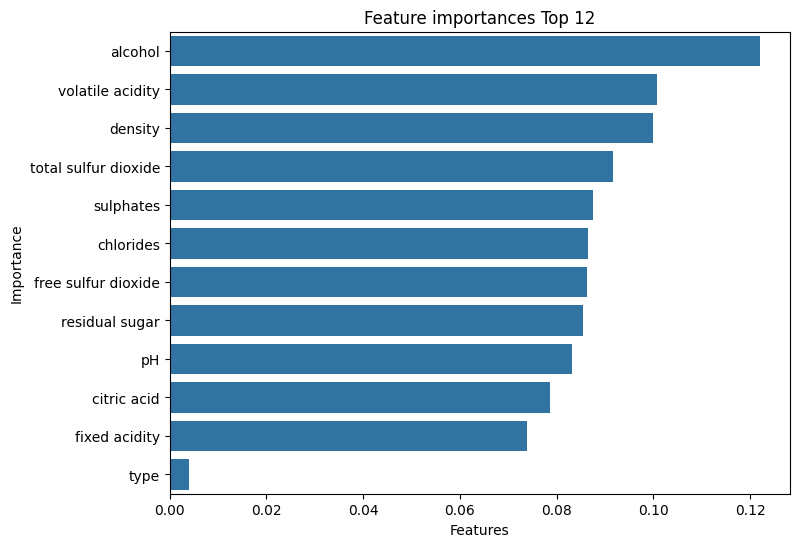

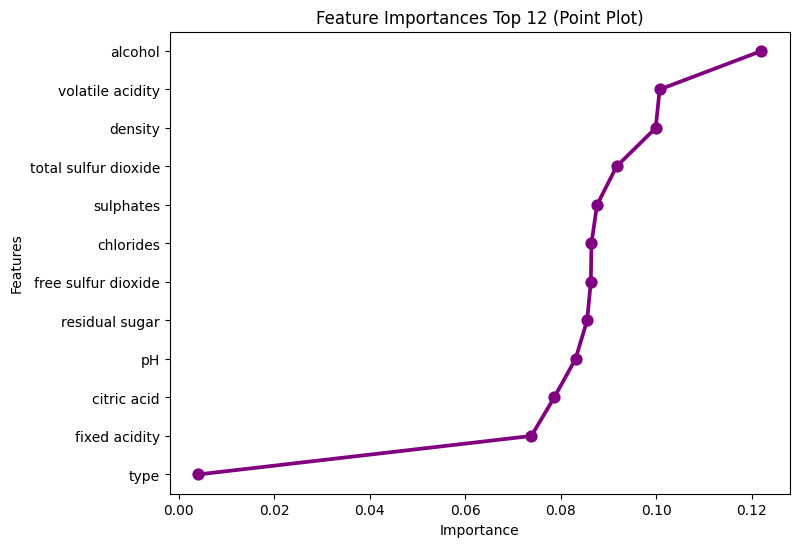

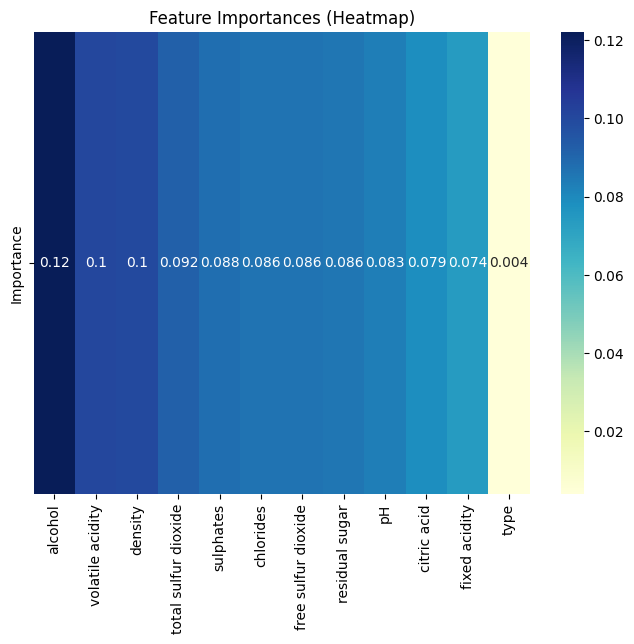

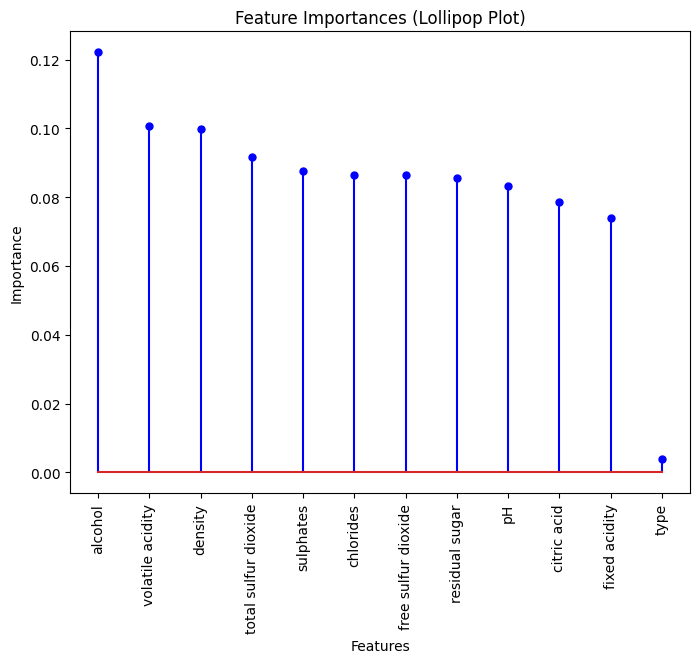

In [ ]:
rf.fit(X_train, y_train)

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top12 = ftr_importances.sort_values(ascending=False)[:12]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 12')
sns.barplot(x=ftr_top12, y=ftr_top12.index)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 12 (Point Plot)')
sns.pointplot(x=ftr_top12.values, y=ftr_top12.index, color='purple', markers="o")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


plt.figure(figsize=(8, 6))
plt.title('Feature Importances (Heatmap)')
sns.heatmap([ftr_top12.values], annot=True, cmap='YlGnBu', yticklabels=["Importance"], xticklabels=ftr_top12.index)
plt.show()


plt.figure(figsize=(8, 6))
plt.title('Feature Importances (Lollipop Plot)')
markerline, stemlines, baseline = plt.stem(ftr_top12.values)
plt.setp(markerline, marker='o', markersize=5, color='blue')
plt.setp(stemlines, color='blue')
plt.xticks(ticks=range(12), labels=ftr_top12.index, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

- 랜덤 포레스트 제출 결과: 점수 0.697

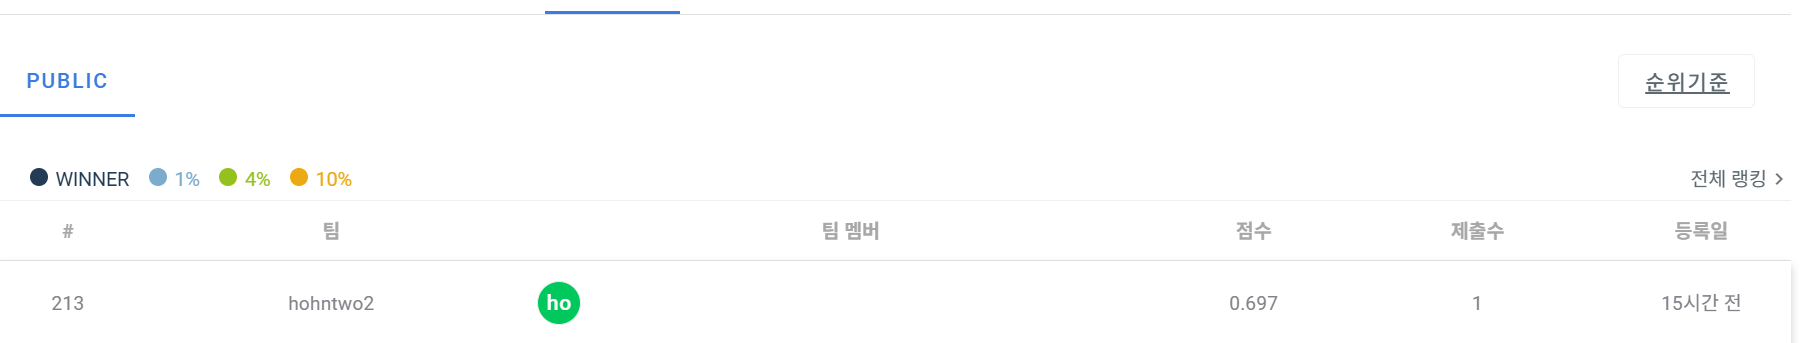

---
### 2. XGBoost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/train.csv')
test = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/test.csv')
submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = train.drop('quality', axis=1)
y = train['quality']
y = enc.fit_transform(y)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
# 검증 성능 평가와 조기 중단을 수행해 보기 위함.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

3    1901
2    1442
4     763
1     145
5     123
0      19
6       4
Name: count, dtype: int64
3    515
2    346
4    161
1     41
5     29
0      7
6      1
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

파라미터 조정 X, earlystopping 안 씀.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb_clf.fit(X_train, y_train)

pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[  0   1   5   1   0   0   0]
 [  0   1  26  14   0   0   0]
 [  0   0 231 115   0   0   0]
 [  0   0 105 380  29   1   0]
 [  0   0   6 108  47   0   0]
 [  0   0   2  19   5   3   0]
 [  0   0   0   1   0   0   0]]
정확도: 0.6018, 정밀도: 0.4346, 재현율: 0.2608, F1:0.2738, AUC:0.8059


In [ ]:
# 예측값을 원래 클래스 값으로 되돌리기
y_pred = xgb_clf.predict(test)
y_pred_original = enc.inverse_transform(y_pred)

submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/sample_submission.csv')
submission['quality'] = y_pred_original

# 제출 파일 확인
submission

,index,quality
0,0,6
1,1,5
2,2,6
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


파라미터 조정 X, earlystopping 씀.

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='multi:softprob', eval_metric='auc', early_stopping_rounds=100, random_state=0)
xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=True)

# 예측 수행
pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)

# 성능 평가 함수 적용
get_clf_eval(y_test, pred, pred_proba)

[0]	validation_0-auc:0.68913
[1]	validation_0-auc:0.69273
[2]	validation_0-auc:0.69466
[3]	validation_0-auc:0.69528
[4]	validation_0-auc:0.69874
[5]	validation_0-auc:0.70005
[6]	validation_0-auc:0.70244
[7]	validation_0-auc:0.70528
[8]	validation_0-auc:0.70738
[9]	validation_0-auc:0.70986
[10]	validation_0-auc:0.71160
[11]	validation_0-auc:0.71491
[12]	validation_0-auc:0.71533
[13]	validation_0-auc:0.71594
[14]	validation_0-auc:0.71730
[15]	validation_0-auc:0.71778
[16]	validation_0-auc:0.71942
[17]	validation_0-auc:0.71898
[18]	validation_0-auc:0.71990
[19]	validation_0-auc:0.72110
[20]	validation_0-auc:0.72275
[21]	validation_0-auc:0.72350
[22]	validation_0-auc:0.72451
[23]	validation_0-auc:0.72439
[24]	validation_0-auc:0.72638
[25]	validation_0-auc:0.72644
[26]	validation_0-auc:0.72702
[27]	validation_0-auc:0.72733
[28]	validation_0-auc:0.72812
[29]	validation_0-auc:0.72984
[30]	validation_0-auc:0.72960
[31]	validation_0-auc:0.73090
[32]	validation_0-auc:0.73125
[33]	validation_0-au

하이퍼 파라미터 조정 + earlystopping 사용

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500]
}

xgb_clf = XGBClassifier(eval_metric='auc', random_state=0, early_stopping_rounds=100)

# GridSearchCV로 하이퍼파라미터 튜닝, 조기 중단 적용
grid_cv = GridSearchCV(xgb_clf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1)
grid_cv.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

# 최적 하이퍼파라미터로 모델 생성
best_xgb = grid_cv.best_estimator_

# 예측 수행 및 평가
pred = best_xgb.predict(X_test)
pred_proba = best_xgb.predict_proba(X_test)

# get_clf_eval 함수로 평가
get_clf_eval(y_test, pred, pred_proba)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
오차 행렬
[[  0   0   3   4   0   0   0]
 [  0   1  22  18   0   0   0]
 [  0   1 227 116   2   0   0]
 [  0   0 119 371  25   0   0]
 [  0   0  10 116  35   0   0]
 [  0   0   0  23   6   0   0]
 [  0   0   0   1   0   0   0]]
정확도: 0.5764, 정밀도: 0.3117, 재현율: 0.2312, F1:0.2306, AUC:0.7345


In [ ]:
submission.to_csv('/content/drive/My Drive/pythonprogramming/ESAA/sample_submission.csv', index=False)

In [ ]:
my_submission = pd.read_csv('/content/drive/My Drive/pythonprogramming/ESAA/sample_submission.csv')
my_submission.head()

,index,quality
0,0,6
1,1,5
2,2,6
3,3,6
4,4,6


In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
importance = best_xgb.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(12)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

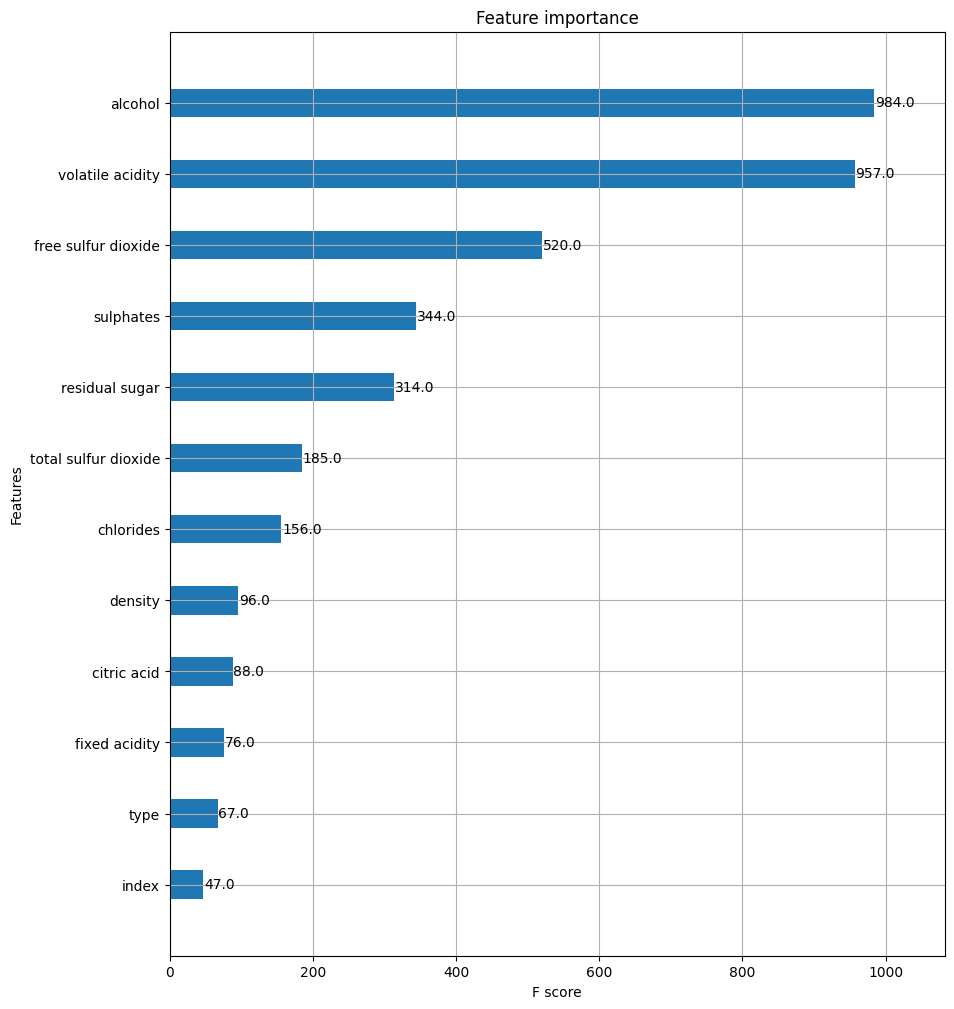

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(best_xgb, ax=ax, max_num_features=12, height=0.4)

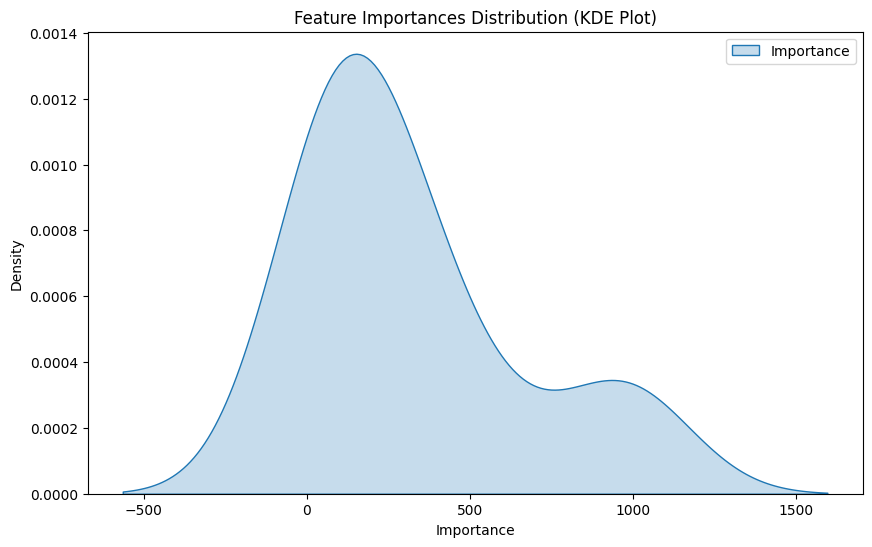

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances Distribution (KDE Plot)')
sns.kdeplot(importance_df, shade=True, color="purple")
plt.xlabel('Importance')
plt.ylabel('Density')
plt.show()

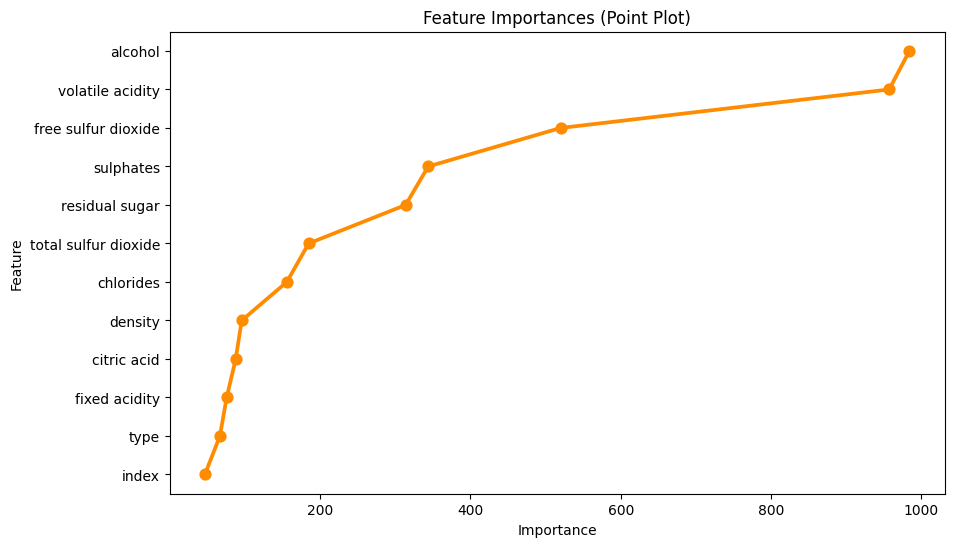

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Importance', y='Feature', data=importance_df, color="darkorange", markers="o")
plt.title('Feature Importances (Point Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

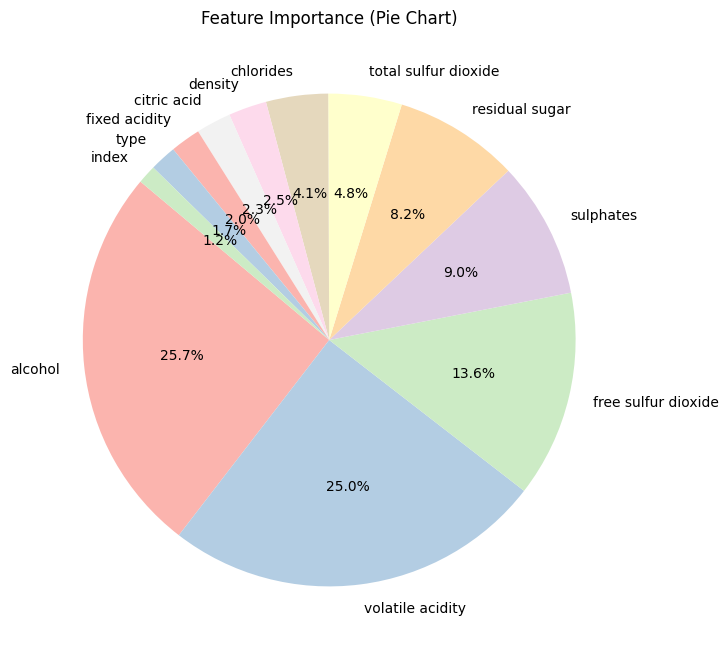

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Pastel1", len(importance_df)))
plt.title('Feature Importance (Pie Chart)')
plt.show()

- 3개의 모델 중 정확도가 제일 높은 첫번째 모델로 submission 파일을 만들어 제출했으며 점수는 0.59가 나옴.

- xgboost 제출 결과: 점수 0.59

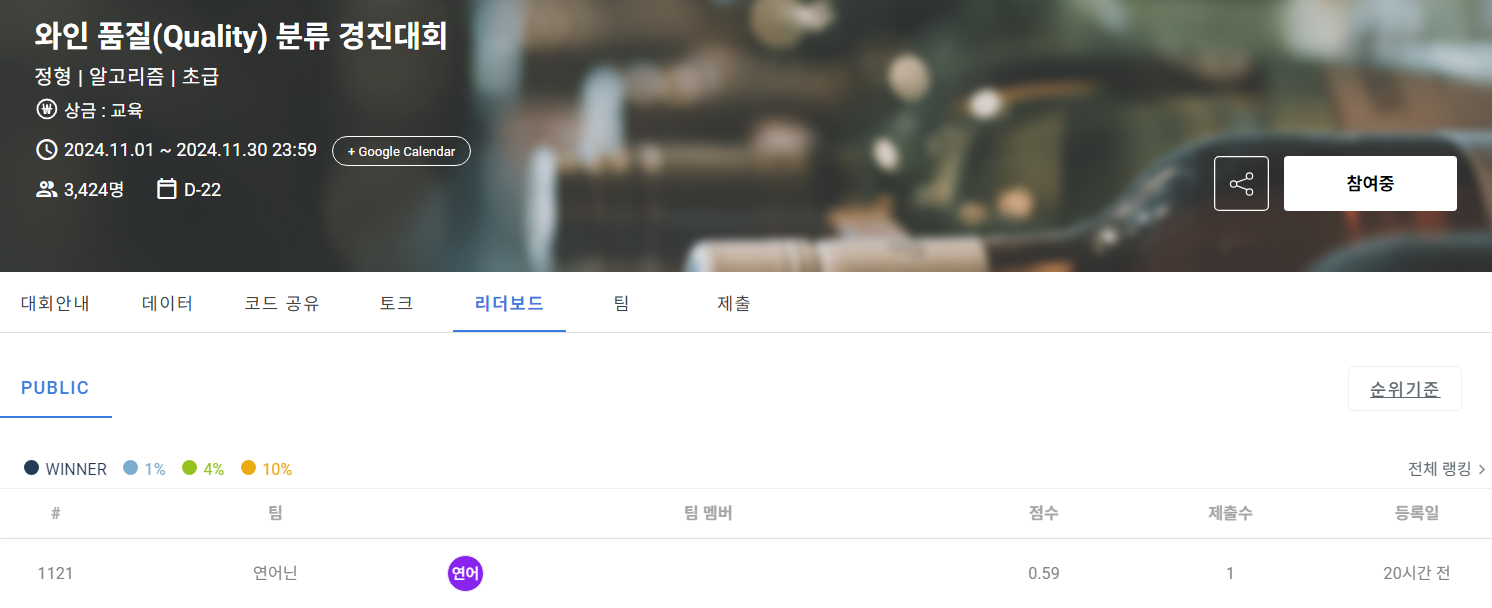

---
### 3. Lightgbm

전처리


In [ ]:
pip install lightgbm==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# 각 열의 결측값 개수 확인
print("Train 데이터 결측값 개수:\n", train.isna().sum())
print("\nTest 데이터 결측값 개수:\n", test.isna().sum())


Train 데이터 결측값 개수:
 index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

Test 데이터 결측값 개수:
 index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64


결측값이 없음을 확인할 수 있다.

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# white -> 0, red -> 1
train['type'] = train['type'].map({'white': 0, 'red': 1}).astype(int)
test['type'] = test['type'].map({'white': 0, 'red': 1}).astype(int)

print("변환 후 Train 데이터:\n", train.head())
print("\n변환 후 Test 데이터:\n", test.head())

변환 후 Train 데이터:
    index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol  type  
0  0.99432  3.44       0.44     10.2     0  
1  0.99690  3.19       0.59      9.5   

white와 red를 숫자형으로 변환



---



Modeling

[GBM]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/train.csv')

train['type'] = train['type'].map({'white': 0, 'red': 1}).astype(int)

X = train.drop('quality', axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}초".format(time.time() - start_time))

GBM 정확도: 0.5918
GBM 수행 시간: 27.8초


[lightgbm]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [ ]:
X_features = train.drop(['index', 'quality'], axis=1)
y_label = train['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [ ]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
early_stopping = lgb.early_stopping(stopping_rounds=50)
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)
log_eval = lgb.log_evaluation(period=10)

callbacks = [
    early_stopping,
    log_eval
]

lgbm_wrapper.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], callbacks=callbacks)

test_features = test.drop(['index'], axis=1)
preds = lgbm_wrapper.predict(test_features)

submission['quality'] = preds
submission.to_csv('/content/sample_data/submission.csv', index=False)


Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 1.04631
[20]	valid_0's multi_logloss: 0.975453
[30]	valid_0's multi_logloss: 0.937066
[40]	valid_0's multi_logloss: 0.907092
[50]	valid_0's multi_logloss: 0.885372
[60]	valid_0's multi_logloss: 0.872288
[70]	valid_0's multi_logloss: 0.861993
[80]	valid_0's multi_logloss: 0.854345
[90]	valid_0's multi_logloss: 0.848423
[100]	valid_0's multi_logloss: 0.843376
[110]	valid_0's multi_logloss: 0.841452
[120]	valid_0's multi_logloss: 0.840408
[130]	valid_0's multi_logloss: 0.839614
[140]	valid_0's multi_logloss: 0.838903
[150]	valid_0's multi_logloss: 0.841129
[160]	valid_0's multi_logloss: 0.843903
[170]	valid_0's multi_logloss: 0.844093
[180]	valid_0's multi_logloss: 0.845953
Early stopping, best iteration is:
[132]	valid_0's multi_logloss: 0.838583


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    if pred_proba is not None:
        y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))
        roc_auc = roc_auc_score(y_test_bin, pred_proba, average='macro', multi_class='ovr')
    else:
        roc_auc = None

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도(macro): {1:.4f}, 재현율(macro): {2:.4f}, F1(macro): {3:.4f}'.format(
        accuracy, precision, recall, f1))

    if roc_auc is not None:
        print('AUC(macro): {0:.4f}'.format(roc_auc))


In [ ]:
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)

get_clf_eval(y_test, preds, pred_proba)


오차 행렬
[[  0   1   0   2   0   0   0]
 [  0   5  18  12   0   0   0]
 [  0   5 238 101   7   0   0]
 [  0   1  90 359  42   1   0]
 [  0   0   7  83  91   2   0]
 [  0   0   0  14   9  11   0]
 [  0   0   0   1   0   0   0]]
정확도: 0.6400, 정밀도(macro): 0.4450, 재현율(macro): 0.3386, F1(macro): 0.3671
AUC(macro): 0.8575


In [ ]:
my_submission = pd.read_csv('/content/sample_data/submission.csv')
my_submission.head()

,index,quality
0,0,5
1,1,5
2,2,5
3,3,6
4,4,6




---
시각화


In [ ]:
importance_df = pd.DataFrame({
    'Feature': lgbm_wrapper.booster_.feature_name(),
    'Importance': lgbm_wrapper.feature_importances_
}).sort_values(by='Importance', ascending=False)

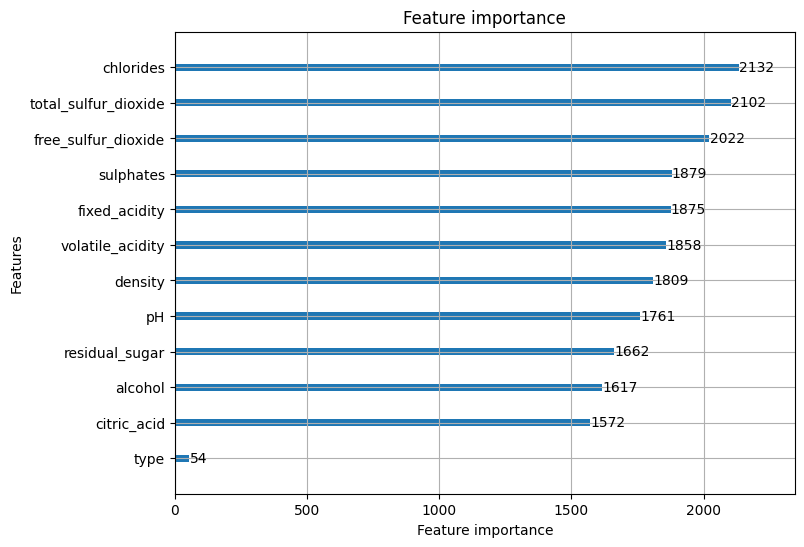

In [ ]:
lgbm_wrapper = lgb.LGBMClassifier()
lgbm_wrapper.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
lgb.plot_importance(lgbm_wrapper, ax=ax)
plt.show()

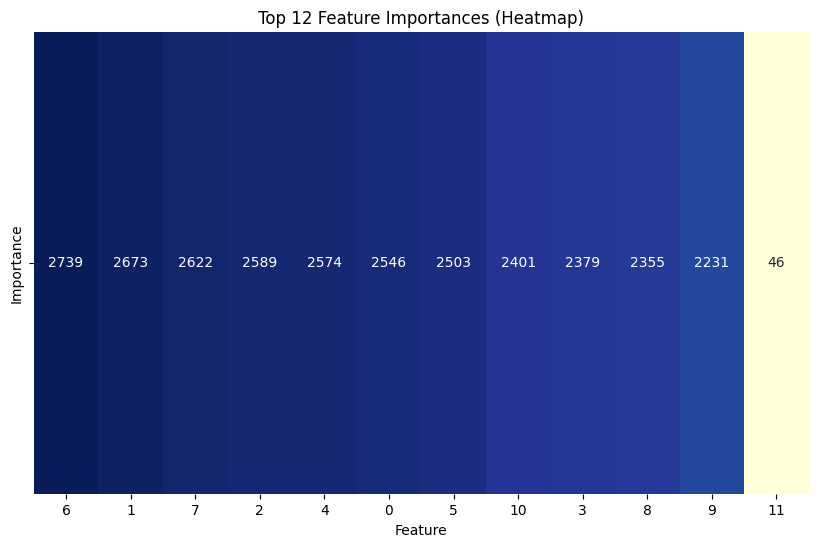

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df[['Importance']].T, annot=True, cmap="YlGnBu", cbar=False, fmt='.0f')
plt.title('Top 12 Feature Importances (Heatmap)')
plt.xlabel('Feature')
plt.show()


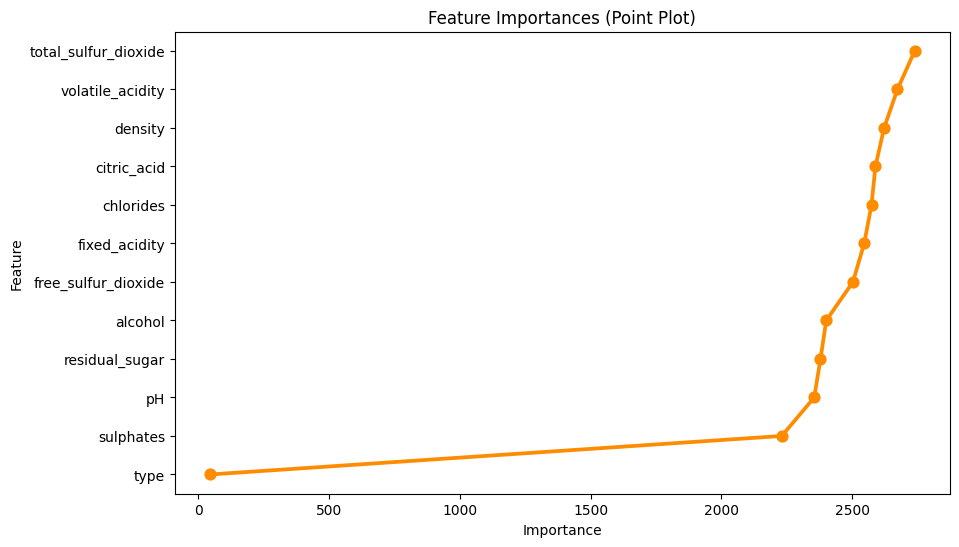

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Importance', y='Feature', data=importance_df, color="darkorange", markers="o")
plt.title('Feature Importances (Point Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


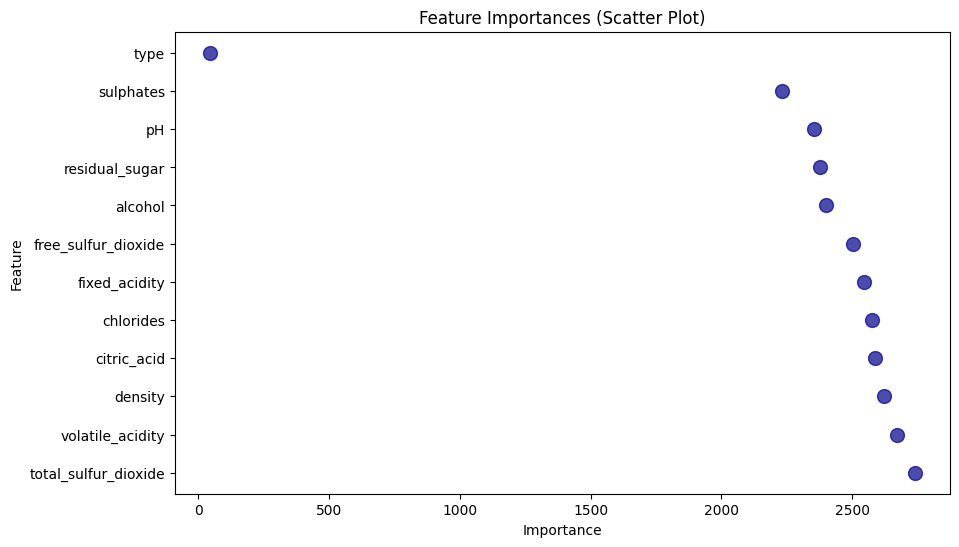

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(importance_df['Importance'], importance_df['Feature'], color="darkblue", s=100, alpha=0.7)
plt.title('Feature Importances (Scatter Plot)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

- ligtgbm 제출 결과: 점수 0.646

---
### 4. Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 와인 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

Training accuracy: 1.0


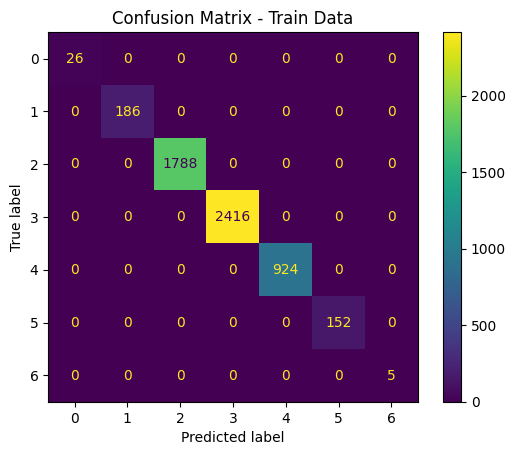

In [ ]:
# 1. 데이터 준비
train = train.drop(columns=['index'])  # index 열 제거
test = test.drop(columns=['index'])

# type 열을 0과 1로 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['type'] = label_encoder.fit_transform(train['type'])
test['type'] = label_encoder.transform(test['type'])

# 목표 변수와 특성 분리
X_train = train.drop(columns=['quality'])
y_train = train['quality']

# 2. 파라미터 그리드 설정 및 모델 학습
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 파라미터로 모델 학습
best_model = grid_search.best_estimator_

# 3. 학습 데이터 성능 평가
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", train_accuracy)

# 학습 데이터에 대한 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.title("Confusion Matrix - Train Data")
plt.show()

# 4. test 데이터 예측
y_pred_test = best_model.predict(test)

# 예측 결과를 submission 파일의 quality 열에 저장
submission['quality'] = y_pred_test
submission.to_csv('my_submission.csv', index=False)

In [ ]:
my_submission = pd.read_csv('my_submission.csv')
my_submission.head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6


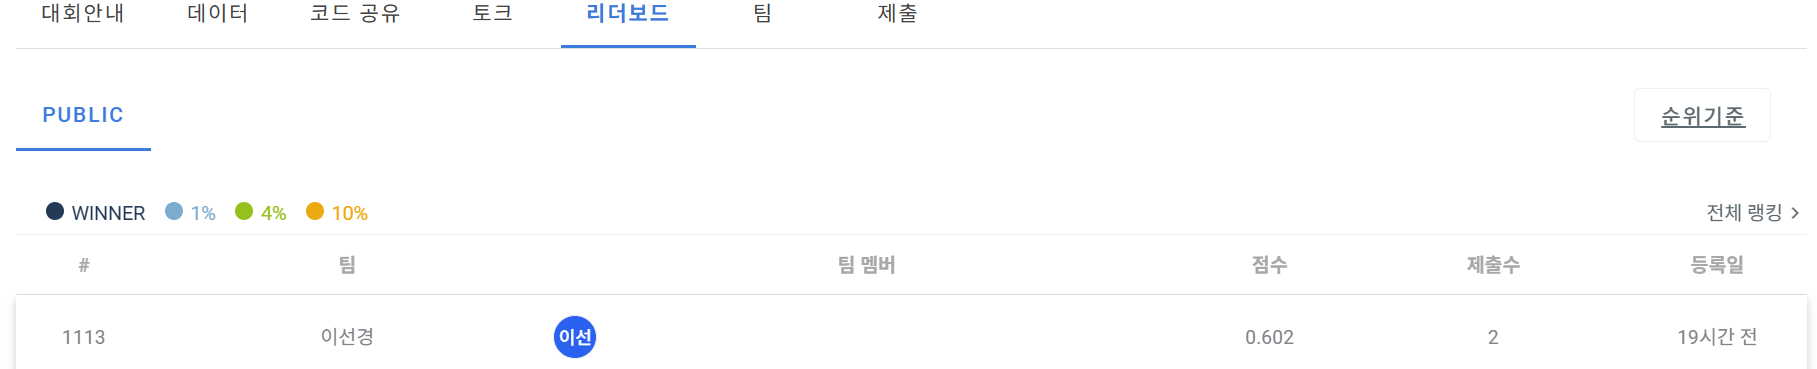

- Decision Tree 제출 결과: 점수 0.602  


---
- 최종적으로 랜덤 포레스트 제출 결과가 점수 0.697로 가장 높아 Randomforest 결과를 선정했음.

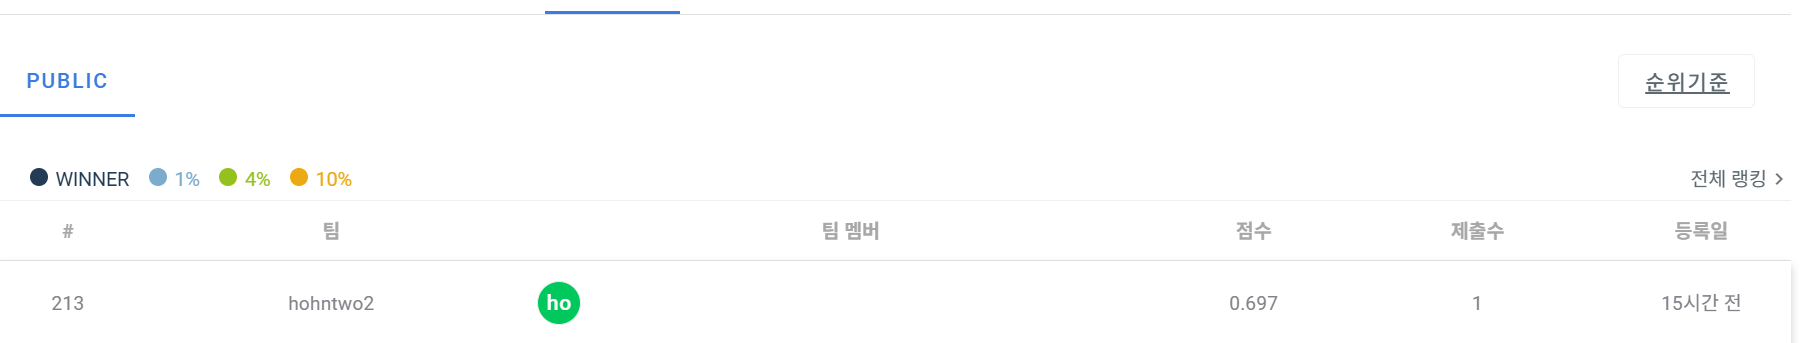